## Task 2

Deep Learning Project

#### Step-1

Importing necessary libraries

In [1]:
# Importing TensorFlow and other necessary libraries
import tensorflow as tf  # TensorFlow is used to build and train the deep learning model
from tensorflow.keras.models import Sequential  # For building a linear stack of layers
from tensorflow.keras.layers import Dense, Flatten  # Dense for fully connected layers, Flatten to flatten input images
from tensorflow.keras.datasets import mnist  # Importing the MNIST dataset directly
import matplotlib.pyplot as plt  # For visualizing accuracy and loss during training
import numpy as np  # For array manipulation
from PIL import Image  # To load and convert images
import cv2  # OpenCV for image preprocessing

#### Step-2

Load and Preprocess Data

In [2]:
# Loading the MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # x: images, y: labels

# Normalizing the pixel values from 0-255 to 0-1 for faster and stable training
x_train = x_train/255.0  # Normalize training data
x_test = x_test/255.0  # Normalize test data

#### Step-3

Build the Model

In [3]:
# Creating a Sequential model (a linear stack of layers)
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 784-element vector
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit) and softmax for classification
])

d:\Udemy\Python\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Step-4

Compile the Model

In [4]:
# Compiling the model
model.compile(
    optimizer='adam',  # Optimizer that adjusts weights to minimize loss
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification with integer labels
    metrics=['accuracy']  # Metric to monitor during training and testing
)

#### Step-5

Train the Model

In [5]:
# Training the model using the training data
# The model will learn for 5 epochs and validate on the test set
history = model.fit(
    x_train, y_train,  # Trainig images and labels
    epochs=5,  # Number of times the model will see the entire training set
    validation_data=(x_test, y_test)  # Data used to evaluate the model after each epoch 
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8751 - loss: 0.4389 - val_accuracy: 0.9591 - val_loss: 0.1375
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9637 - loss: 0.1236 - val_accuracy: 0.9683 - val_loss: 0.0991
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0779 - val_accuracy: 0.9730 - val_loss: 0.0870
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9837 - loss: 0.0550 - val_accuracy: 0.9765 - val_loss: 0.0750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9873 - loss: 0.0423 - val_accuracy: 0.9773 - val_loss: 0.0737


#### Step-6

Visualize Training Results

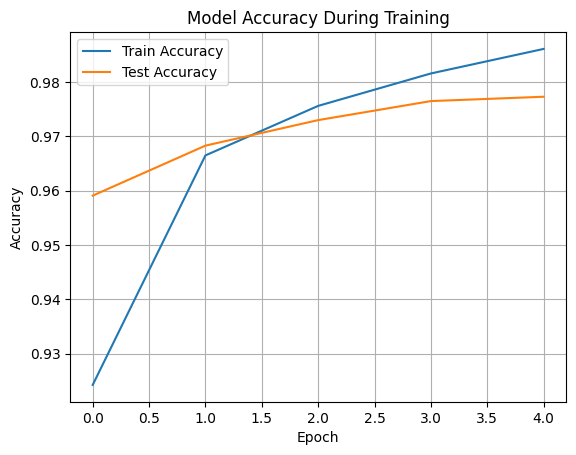

In [6]:
# Plotting training and validation accuracy to visualize model performance
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Test Accuracy')  # Plot validation (test) accuracy
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Model Accuracy During Training')  # Title of the plot
plt.legend()  # Show legend
plt.grid(True)  # Add a grid to the plot
plt.show()  # Display the plot

#### Step-7

Evaluate the Model

In [7]:
# Evaluating the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)  # Compute loss and accuracy
print(f'\nTest accuracy: {test_acc:.2f}')  # Print the final test accuracy

313/313 - 0s - 1ms/step - accuracy: 0.9773 - loss: 0.0737

Test accuracy: 0.98


Testing the model with a custom image

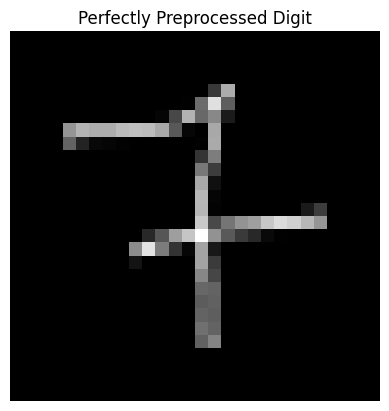

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Label: 7


In [8]:
def preprocess_custom_image(image_path):
    import cv2
    import numpy as np

    # Step 1: Read and convert to grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Step 2: Apply binary inverse threshold so digit is white (255), background black (0)
    _, img_thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)

    # Step 3: Find contours
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        raise ValueError("No contours found. Try adjusting threshold or check your image.")

    # Step 4: Get bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))

    # Step 5: Crop the digit region
    digit = img_thresh[y:y+h, x:x+w]

    # Step 6: Resize to 20x20
    digit_resized = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_AREA)

    # Step 7: Pad to 28x28 (MNIST style)
    padded_digit = np.pad(digit_resized, ((4, 4), (4, 4)), 'constant', constant_values=0)

    # Step 8: Normalize to 0–1
    normalized = padded_digit.astype('float32') / 255.0

    # Step 9: Reshape to match model input
    reshaped = normalized.reshape(1, 28, 28)

    return reshaped

# Path to the image file
custom_image_path = 'my_digit.png'  # Replace this with your image filename strictly in png format

img = preprocess_custom_image(custom_image_path)

# Visualize
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title("Perfectly Preprocessed Digit")
plt.axis('off')
plt.show()

# Predict
pred = model.predict(img)
print("Predicted Label:", np.argmax(pred))